<a href="https://colab.research.google.com/github/juwilliams05/Data-Science-1---1er-Entregable/blob/main/ProyectoDSParte1Williams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de la producción de Electricidad.

En este trabajo analizaremos la producción mensual mundial de electricidad, desagregada por país, tipo de fuente energética y período temporal.
Vamos a estudiar las tendencias globales en el uso de las distintas fuentes energéticas, su variabilidad estacional y temporal.
La diferencia entre países en cuanto a sus matrices energéticas.
La participación relativa de cada fuente en el total mensual.
Esto es relevante para comprender los patrones de consumo a futuro y poder detectar tanto anomalías como oportunidades para mejorar los recursos energéticos a nivel global.




Hipotesis a estudiar.

Como primera hipotesis vamos a trabajar sobre la producción eléctrica y trataremos de demostrar la tendencia en los proximos años.
Seguidamente veremos la participación de la energía solar en el total mensual y demostraremos como ha crecido desde el año 2015.

Hipotesis Nula.

No existe una relación entre las estaciones del año y el volumen de producción e intentaremos ver que la intensidad energética de una fuente no está relacionada con el volumen de producción mensual.


In [9]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [10]:
# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias (útil para presentaciones)

In [13]:
import requests

url = "https://raw.githubusercontent.com/juwilliams05/Data-Science-1---1er-Entregable/refs/heads/main/Producci%C3%B3n%20mensual%20mundial%20de%20electricidad.csv"

response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado

country;country_clean;region;is_developed;year;month;quarter;date;period;season;year_category;energy_source;energy_source_clean;source_category;energy_type;electricity_production_gwh;share_of_total;is_renewable;is_fossil;energy_intensity_category
Argentina;Argentina;South America;False;2015;1;1;1/1


In [18]:
#Análisis exploratorio de datos-

url = "https://raw.githubusercontent.com/juwilliams05/Data-Science-1---1er-Entregable/refs/heads/main/Producci%C3%B3n%20mensual%20mundial%20de%20electricidad.csv"

df = pd.read_csv(url, sep=';') # lee el archivo,
df.head()# Muestra las primeras 5 filas

,country,country_clean,region,is_developed,year,month,quarter,date,period,season,year_category,energy_source,energy_source_clean,source_category,energy_type,electricity_production_gwh,share_of_total,is_renewable,is_fossil,energy_intensity_category
0,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Coal,Coal,Fossil Fuel,Conventional,2.747.782,0.0200795602175218,False,True,Medium
1,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Geothermal,Geothermal,Renewable,Clean Energy,0.0,0.0,True,False,Low
2,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Hydro,Hydro,Renewable,Clean Energy,31.843.542,0.2325302376302145,True,False,High
3,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Natural gas,Natural Gas,Fossil Fuel,Conventional,73.921.692,0.5368146654789634,False,True,High
4,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Net electricity production,Net Electricity Production,Other,Other,137.590.832,1.0,False,False,Very High


In [20]:
 # Estadísticas básicas de columnas numéricas
df.describe()

,year,month
count,4720.000000,4720.0
mean,1686.371186,1.0
std,745.936994,0.0
min,1.000000,1.0
25%,2011.000000,1.0
50%,2015.000000,1.0
75%,2019.000000,1.0
max,2022.000000,1.0


In [21]:
# describe la cantidad de filas y columnas que tiene el dataset

df.shape

(4720, 20)

In [22]:
# muestra tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     4720 non-null   object
 1   country_clean               4720 non-null   object
 2   region                      4720 non-null   object
 3   is_developed                4720 non-null   object
 4   year                        4720 non-null   int64 
 5   month                       4720 non-null   int64 
 6   quarter                     4720 non-null   object
 7   date                        4720 non-null   object
 8   period                      4720 non-null   object
 9   season                      4720 non-null   object
 10  year_category               4720 non-null   object
 11  energy_source               4720 non-null   object
 12  energy_source_clean         4720 non-null   object
 13  source_category             4720 non-null   obje

In [23]:
# Contamos los valores faltantes por columna.
df.isnull().sum()

,0
country,0
country_clean,0
region,0
is_developed,0
year,0
month,0
quarter,0
date,0
period,0
season,0


In [24]:
# Convertimos la columna de producción eléctrica a formato numérico

df['electricity_production_gwh'] = df['electricity_production_gwh'].astype(str).str.replace('.', '', regex=False)
df['electricity_production_gwh'] = pd.to_numeric(df['electricity_production_gwh'], errors='coerce')


In [25]:

# Elimino filas con valores no convertibles
df = df.dropna(subset=['electricity_production_gwh'])


In [26]:

#Convierto la columna de fecha a formato datetime

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])


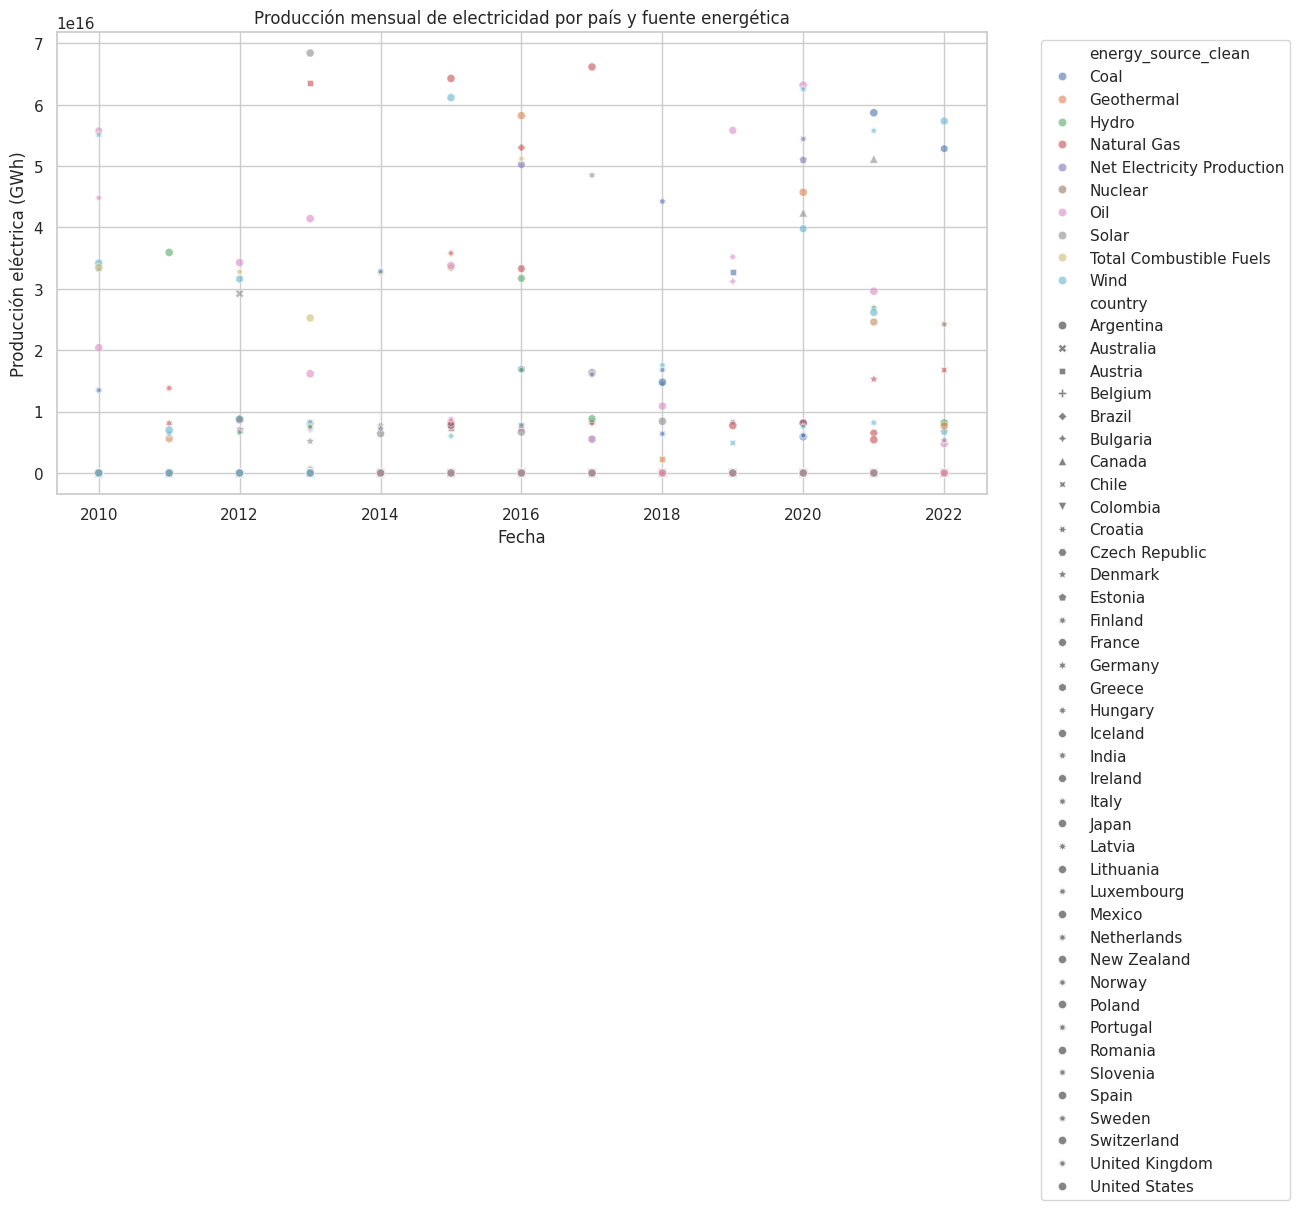

In [34]:
# Crear gráfico de dispersión

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='date', y='electricity_production_gwh', hue='energy_source_clean', style='country', alpha=0.6)

plt.title('Producción mensual de electricidad por país y fuente energética')
plt.xlabel('Fecha')
plt.ylabel('Producción eléctrica (GWh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Interpretación.

En Argentina
 Las fuentes dominantes son: Gas natural, hidroeléctrica y petróleo.
La Producción nuclear es etable, con valores entre 5 y 10 mil millones GWh.

A nivel mundial.

Fuente Solar y eólica#: Aunque con menor volumen, muestran crecimiento en los últimos años.

Producción Neta:  Se mantiene como referencia para el total mensual, útil para calcular participaciones relativas.

Variabilidad.

Las fuentes como hidroeléctrica y gas natural presentan alta variabilidad, posiblemente por factores estacionales o de demanda.

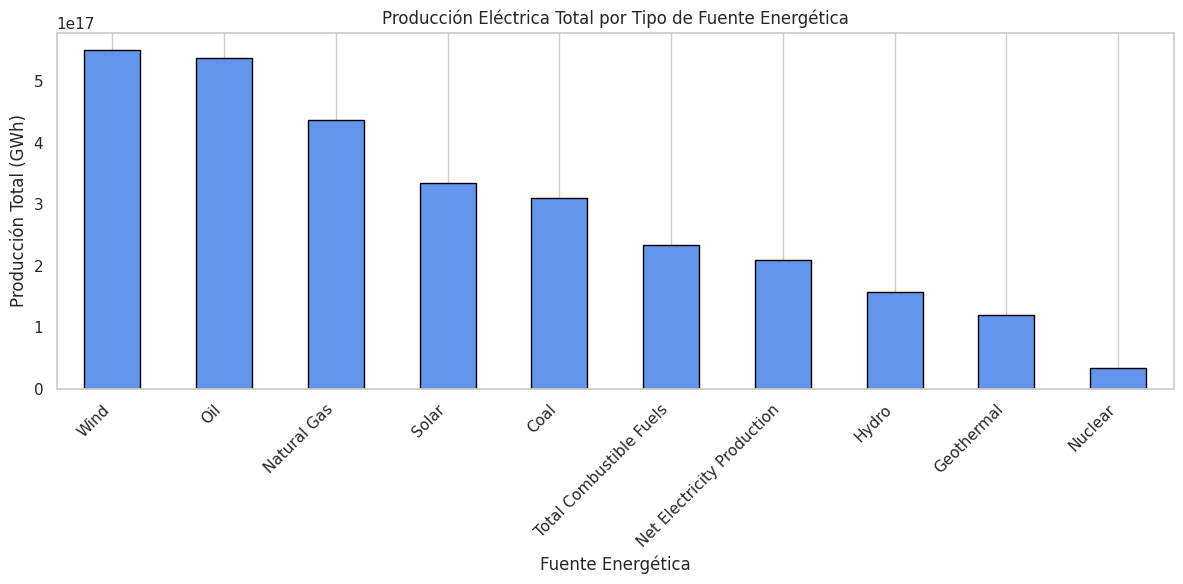

In [36]:
# Realizamos un grafico de barras.

## Agrupar por tipo de fuente energética y sumar la producción total
grouped = df.groupby('energy_source_clean')['electricity_production_gwh'].sum().sort_values(ascending=False)

## Creamos el grafico.

plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Producción Eléctrica Total por Tipo de Fuente Energética')
plt.xlabel('Fuente Energética')
plt.ylabel('Producción Total (GWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Observaciones.

Las fuentes fósiles como el gas natural y el carbón lideran la producción total, reflejando su amplia disponibilidad y capacidad instalada en muchos países.

Las fuentes renovables como la hidroeléctrica también tienen una participación significativa, especialmente en regiones con abundantes recursos hídricos.

Solar y eólica aparecen con menor producción total, lo que puede deberse a su adopción más reciente o a limitaciones geográficas y tecnológicas.

La distribución está concentrada en pocas fuentes dominantes, lo que evidencia una fuerte dependencia energética global de ciertos recursos.